In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
import matplotlib.mlab as ml

In [10]:
def plot_tf(setp,met,c="b"):
	#figure(figsize(12,10))
	cp=ml.csd(setp,met,2048,Fs=8000)
	pp=ml.psd(setp,2048,Fs=8000)

	subplot(311)
	plot(cp[1],20*log10(abs(cp[0]/pp[0])),c)
	xlim(0,1000)
	ylim(-50,5)
	xlabel("Frequency")
	ylabel("Gain in dB")
	grid(which="minor")
	subplot(312)
	plot(cp[1],unwrap(angle(cp[0]/pp[0]))/pi*180,c)
	plot([0,1000],[-180,-180],"r")
	xlim(0,1000)
	ylim(-360,0)
	xlabel("Frequency")
	ylabel("Phase in deg")
	grid(which="minor")
	subplot(313)
	cc=cohere(setp,met,2048,Fs=4000,color=c)
	xlim(0,1000)
	ylim(0,1.03)
	grid(which="minor")
	xlabel("Frequency")
	ylabel("Coherence")

In [4]:
def plot_tfl(name,c="b",al=0):
	data=loadtxt(name,comments="%")
	#figure(figsize(12,10))
	subplot(311)
	plot(data[:,0],data[:,1],c,alpha=al)
	xlim(0,1000)
	ylim(-50,5)
	xlabel("Frequency")
	ylabel("Gain in dB")
	grid(which="minor")
	subplot(312)
	plot(data[:,0],unwrap(data[:,2]/180*pi)*180/pi,c,alpha=al)
	plot([0,1000],[-180,-180],"r")
	xlim(0,1000)
	ylim(-360,0)
	xlabel("Frequency")
	ylabel("Phase in deg")
	grid()
	subplot(313)
	plot(data[:,0],data[:,3]/100.,c,alpha=al)
	xlim(0,1000)
	ylim(0,1.03)
	grid(which="minor")
	xlabel("Frequency")
	ylabel("Coherence")


In [5]:
def plot_tfs(filename,c="b",al=0):
	from matplotlib.mlab import csd,psd
	data=loadtxt(filename)
	setp=data[:,0].T
	met=data[:,1].T
	cp=ml.csd(setp,met,2048,Fs=4000)
	pp=ml.psd(setp,2048,Fs=4000)

	subplot(311)
	plot(cp[1],20*log10(abs(cp[0]/pp[0])),c,alpha=al)
	xlim(0,1000)
	ylim(-50,5)
	xlabel("Frequency")
	ylabel("Gain in dB")
	grid()
	subplot(312)
	plot(cp[1],unwrap(angle(cp[0]/pp[0]))/pi*180,c,alpha=al)
	plot([0,1000],[-180,-180],"r")
	xlim(0,1000)
	ylim(-360,0)
	xlabel("Frequency")
	ylabel("Phase in deg")
	grid(which="minor")
	subplot(313)
	cc=cohere(setp,met,2048,Fs=4000,color=c,alpha=al)
	xlim(0,1000)
	ylim(0,1.03)
	grid(which="minor")
	xlabel("Frequency")
	ylabel("Coherence")


In [16]:
def plot_tfs_Z(filename,c="b",al=0):
	from matplotlib.mlab import csd,psd
	data=loadtxt(filename)
	setp=data[:,0].T
	met=data[:,1].T
	cp=ml.csd(setp,met,2048,Fs=4000)
	pp=ml.psd(setp,2048,Fs=4000)
	plot(cp[1],20*log10(abs(cp[0]/pp[0])),c,alpha=al)
	xlim(200,600)
	ylim(-10,5)
	xlabel("Frequency")
	ylabel("Gain in dB")
	grid(which="minor")

def plot_tfl_Z(name,c="b",al=0):
	data=loadtxt(name,comments="%")
	#figure(figsize(12,10))
	plot(data[:,0],data[:,1],c,alpha=al)
	xlim(0,1000)
	ylim(-10,5)
	xlabel("Frequency")
	ylabel("Gain in dB")
	grid(which="minor")

# Original DDL piezos

Thanks to ESO mesurements on the DDL we have the Local piezo transfer function of the original 4 DDL
The Transfer functions are shown here in a single graph.

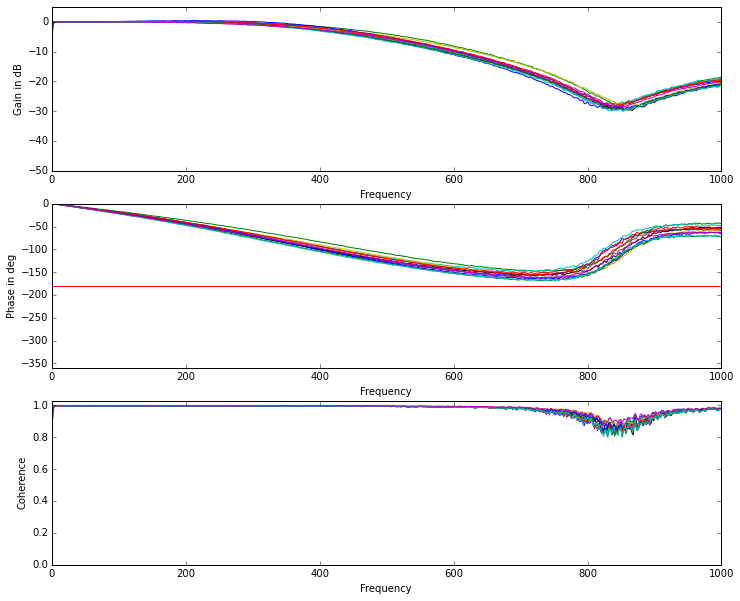

In [9]:
lst3=glob.glob("Mesure_TF/DDL*500.tfl")
lst3.sort()
cols=["b","r","g","c","m","y","k","b","r","g","c","m","y","k"]
figure(figsize(12,10))
for i,f in enumerate(lst3):
    plot_tfl(f,c=cols[i],al=1)

#Tuning DDL6 Piezos

As it has been very difficult to tune the piezo transfer function using the complete loop, I tried to mimick the local TF at the piezo level. The results are shown below. The result is very similar though there are some differences :

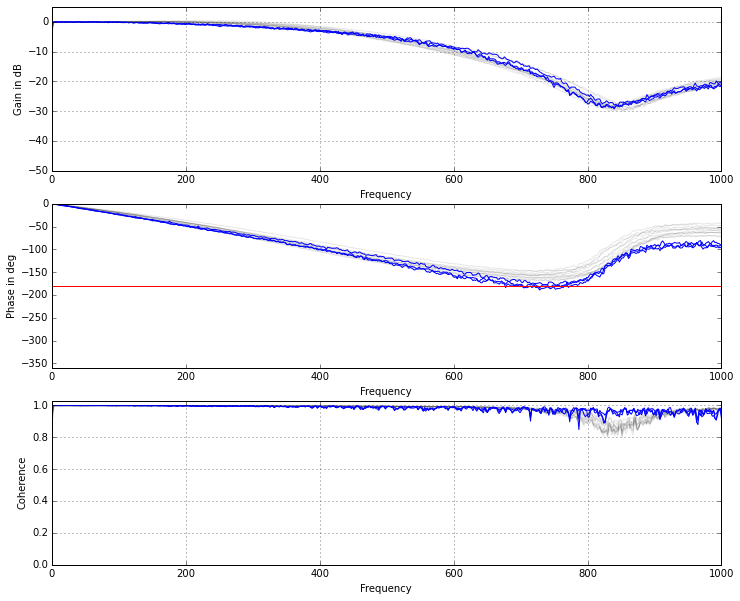

In [7]:
for i,f in enumerate(lst3):
    plot_tfl(f,"k",al=0.1)

lst=glob.glob("Mesure_TF/data/*.tfs")

for f in lst:
    plot_tfs(f,"b",al=1)


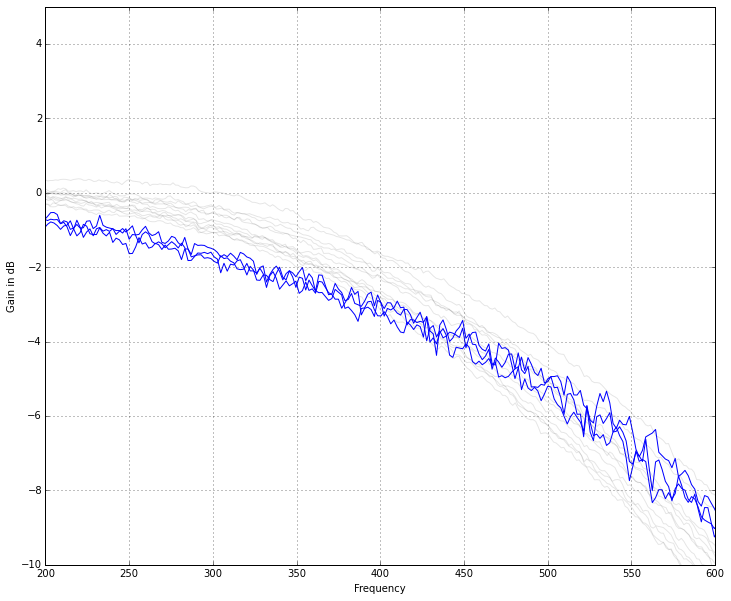

In [19]:
for i,f in enumerate(lst3):
    plot_tfl_Z(f,"k",al=0.1)

for f in lst:
    plot_tfs_Z(f,"b",al=1)
grid()

The blue curve are the new tuning, the grey ones are the one in paranal

I managed to get a TF that is globally very near to the one in paranal. However in the detail we see subtle differences: 
* the gain is slightly lower in the 200-400 Hz band. I never managed to make it rise
* the phase delay is slightly higher

However the result is disapoint what happens when I try to measure the full loop :

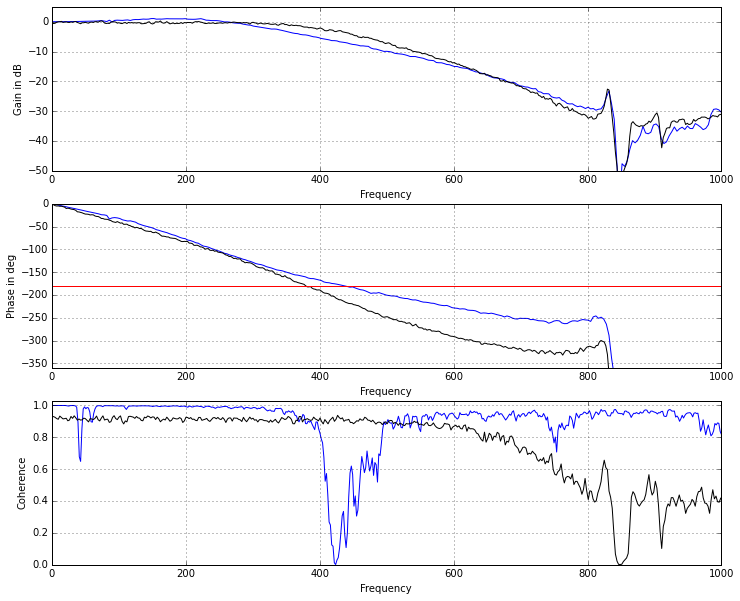

In [8]:
data=loadtxt("Mesure_TF/data/data_lcu/ddltestTacCloseloopControl_lddl6_transfer_20150825.093322.out")
setp=array([])
met=array([])
setp=r_[setp,data[:,4].T]
met=r_[met,data[:,3].T]

figure(figsize(12,10))
plot_tf(setp,met)
plot_tfl("../../prima/mesures_ddl/transfer_function/version_chili/ddl3.tfl","k",al=1)